https://www.perplexity.ai/search/c7c67e8b-1075-40c1-ab9e-69b6324a8954

In [ ]:
!pip install yfinance

In [5]:
import yfinance as yf
ticker = '2330.TW' #台積電
start_date = '2024-01-01'
end_date = '2024-06-01'

data = yf.download(ticker, start=start_date, end=end_date, interval='1d', auto_adjust=False)
#'Adj Close'收盤
data['Adj Close']['2330.TW'] 

[*********************100%***********************]  1 of 1 completed


Date
2024-01-02    582.770691
2024-01-03    568.029541
2024-01-04    569.994934
2024-01-05    566.063965
2024-01-08    572.943176
                 ...    
2024-05-27    857.997437
2024-05-28    854.048157
2024-05-29    846.149475
2024-05-30    827.390076
2024-05-31    810.605225
Name: 2330.TW, Length: 98, dtype: float64

In [8]:
from pandas import DataFrame
start_date = '2024-01-01'
end_date = '2025-01-01'

tickers = ['2330.TW', '2303.TW', '2454.TW', '2317.TW']
all_data:dict[str:DataFrame]= {ticker: yf.download(ticker,start=start_date, end=end_date, interval='1d',auto_adjust=False) for ticker in tickers }

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
all_data

{'2330.TW': Price         Adj Close   Close    High     Low    Open    Volume
 Ticker          2330.TW 2330.TW 2330.TW 2330.TW 2330.TW   2330.TW
 Date                                                             
 2024-01-02   582.770691   593.0   593.0   589.0   590.0  26059058
 2024-01-03   568.029480   578.0   585.0   576.0   584.0  37106763
 2024-01-04   569.994934   580.0   581.0   577.0   580.0  15309129
 2024-01-05   566.063965   576.0   580.0   574.0   578.0  18158971
 2024-01-08   572.943237   583.0   585.0   579.0   582.0  17761275
 ...                 ...     ...     ...     ...     ...       ...
 2024-12-25  1075.403198  1085.0  1090.0  1080.0  1090.0  15481622
 2024-12-26  1075.403198  1085.0  1090.0  1085.0  1085.0  14374900
 2024-12-27  1080.358887  1090.0  1095.0  1080.0  1080.0  24948385
 2024-12-30  1080.358887  1090.0  1095.0  1085.0  1090.0  23954634
 2024-12-31  1065.491699  1075.0  1085.0  1075.0  1080.0  28397820
 
 [242 rows x 6 columns],
 '2303.TW': Price       

In [11]:
import pandas as pd

price_df = pd.DataFrame({key:dataframe['Adj Close'][key] for key,dataframe in all_data.items()})
price_df1 = price_df.rename(columns={'2330.TW':'台積電','2303.TW':'聯電','2454.TW':'聯發科','2317.TW':'鴻海'})
price_df1

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,582.770691,49.163513,915.833191,102.375000
2024-01-03,568.029480,47.932056,889.693176,101.887505
2024-01-04,569.994934,48.121510,889.309875,101.400002
2024-01-05,566.063965,48.121510,882.601685,101.400002
2024-01-08,572.943237,47.837330,881.643372,98.962502
...,...,...,...,...
2024-12-25,1075.403198,44.049999,1381.102417,186.500000
2024-12-26,1075.403198,43.700001,1390.897583,187.500000
2024-12-27,1080.358887,43.599998,1400.692627,186.500000


In [12]:
price_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2024-01-02 to 2024-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   台積電     242 non-null    float64
 1   聯電      242 non-null    float64
 2   聯發科     242 non-null    float64
 3   鴻海      242 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [ ]:
#看每家公司股票的線性相關性
price_df1.corr()

,台積電,聯電,聯發科,鴻海
台積電,1.000000,0.134518,0.884534,0.935593
聯電,0.134518,1.000000,0.143217,0.294091
聯發科,0.884534,0.143217,1.000000,0.831721
鴻海,0.935593,0.294091,0.831721,1.000000


In [14]:
price_df1.head()

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,582.770691,49.163513,915.833191,102.375000
2024-01-03,568.029480,47.932056,889.693176,101.887505
2024-01-04,569.994934,48.121510,889.309875,101.400002
2024-01-05,566.063965,48.121510,882.601685,101.400002
2024-01-08,572.943237,47.837330,881.643372,98.962502


In [19]:
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

In [20]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

<Axes: xlabel='Date'>

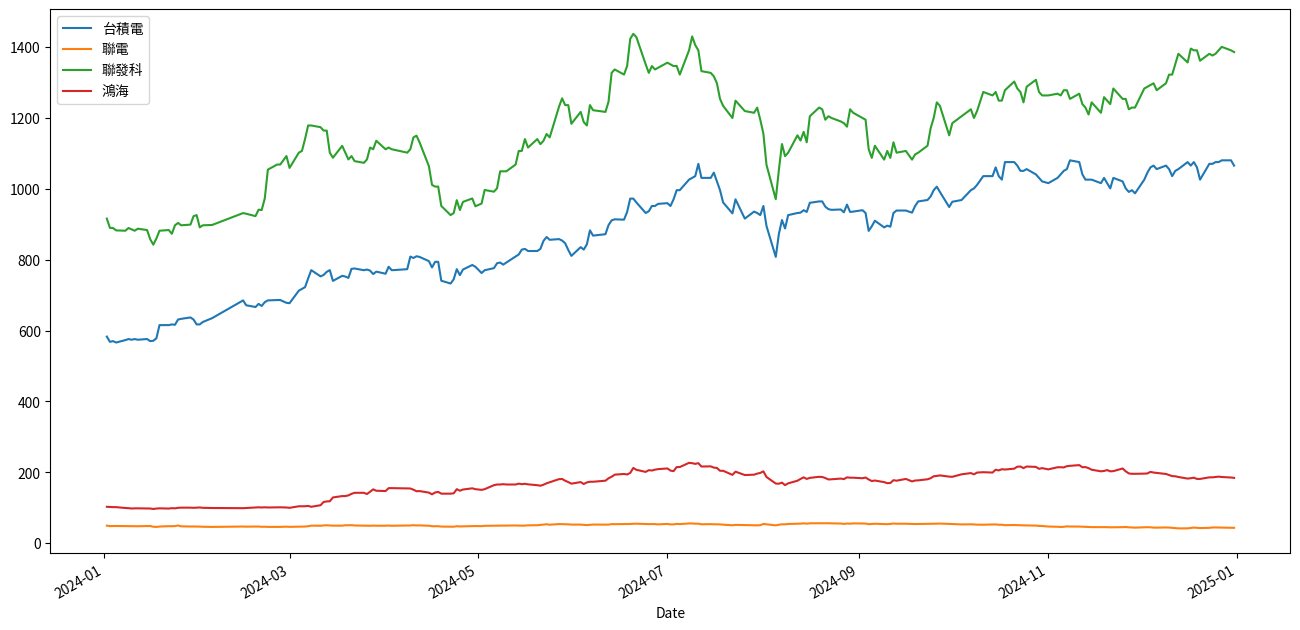

In [23]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(16,8))
axes = figure.add_subplot()
price_df1.plot.line(ax=axes)